In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("Retail_Transactions_2000.csv")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())


Shape: (2000, 11)
Columns: ['TransactionID', 'CustomerID', 'Gender', 'Age', 'City', 'ProductCategory', 'Quantity', 'Price', 'PurchaseDate', 'PaymentMode', 'TotalAmount']
  TransactionID CustomerID  Gender  Age       City ProductCategory  Quantity  \
0        T00001      C2824  Female   33  Bengaluru         Fashion         3   
1        T00002      C1409   Other   20       Pune           Books         5   
2        T00003      C5506   Other   47       Pune       Furniture         1   
3        T00004      C5012   Other   21  Hyderabad       Groceries         5   
4        T00005      C4657  Female   41    Chennai          Sports         1   

   Price PurchaseDate PaymentMode  TotalAmount  
0   4479   2023-03-15        Cash        13437  
1   1051   2023-01-22        Card         5255  
2    111   2023-04-18      Wallet          111  
3   2946   2023-08-09        Cash        14730  
4   3123   2023-09-23      Wallet         3123  


In [4]:
# 2. Check Missing and Duplicates
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())



Missing Values:
 TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
dtype: int64

Duplicate Rows: 0


In [6]:
# 3. Handle Missing Data
df['Age'].fillna(df['Age'].median())
df['City'].fillna(df['City'].mode()[0])
df.dropna(subset=['TransactionID', 'ProductCategory'], inplace=True)


In [7]:
# 4. Clean Categorical Data
df['Gender'] = df['Gender'].str.strip().str.lower().replace({
    'male': 'Male', 'm': 'Male',
    'female': 'Female', 'f': 'Female',
    'other': 'Other'
})

In [8]:
# 5. Correct Negative or Zero Values
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]


In [9]:
# 6. Feature Engineering
df['TotalAmount'] = df['Quantity'] * df['Price']

# Convert to datetime
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'], errors='coerce')
df['Month'] = df['PurchaseDate'].dt.month_name()
df['DayOfWeek'] = df['PurchaseDate'].dt.day_name()

In [10]:

# Create Age Groups
bins = [0, 25, 40, 60, 120]
labels = ['18-25', '26-40', '41-60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


In [11]:

# 7. Final Verification
print("\nAfter Cleaning:")
print(df.info())

# Save cleaned data
df.to_csv("Retail_Cleaned.csv", index=False)
print("\n✅ Cleaned dataset saved as Retail_Cleaned.csv")



After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    2000 non-null   object        
 1   CustomerID       2000 non-null   object        
 2   Gender           2000 non-null   object        
 3   Age              2000 non-null   int64         
 4   City             2000 non-null   object        
 5   ProductCategory  2000 non-null   object        
 6   Quantity         2000 non-null   int64         
 7   Price            2000 non-null   int64         
 8   PurchaseDate     2000 non-null   datetime64[ns]
 9   PaymentMode      2000 non-null   object        
 10  TotalAmount      2000 non-null   int64         
 11  Month            2000 non-null   object        
 12  DayOfWeek        2000 non-null   object        
 13  AgeGroup         2000 non-null   category      
dtypes: category(1), datetim

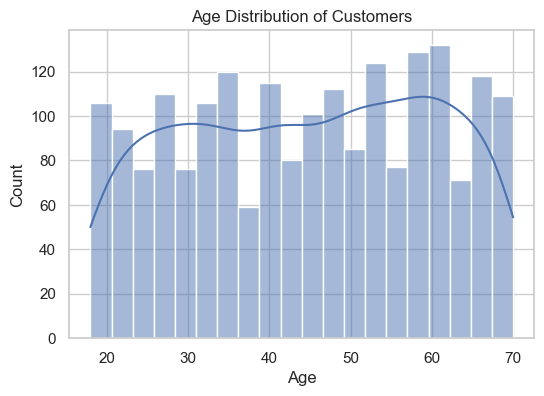

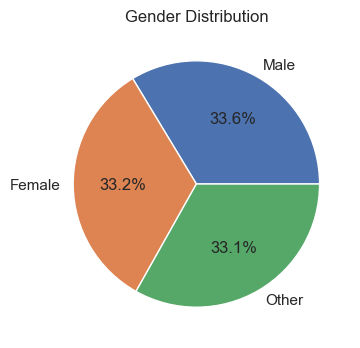

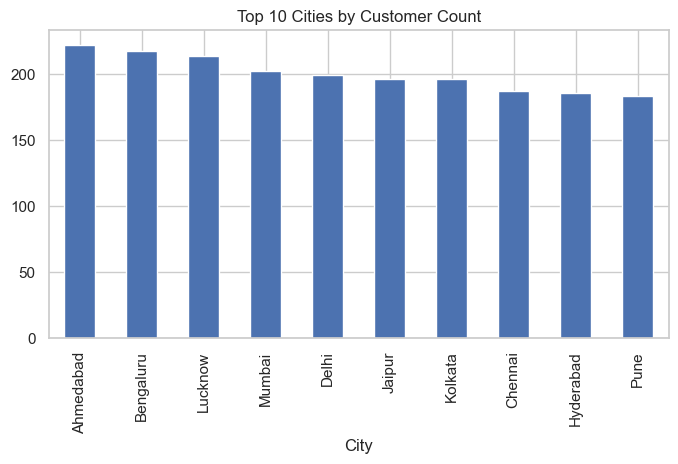

In [12]:
# PART B: DATA VISUALIZATION
# ---------------------------

sns.set(style="whitegrid")

# 1. Customer Demographics
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.show()

plt.figure(figsize=(5,4))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

plt.figure(figsize=(8,4))
df['City'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Cities by Customer Count')
plt.show()

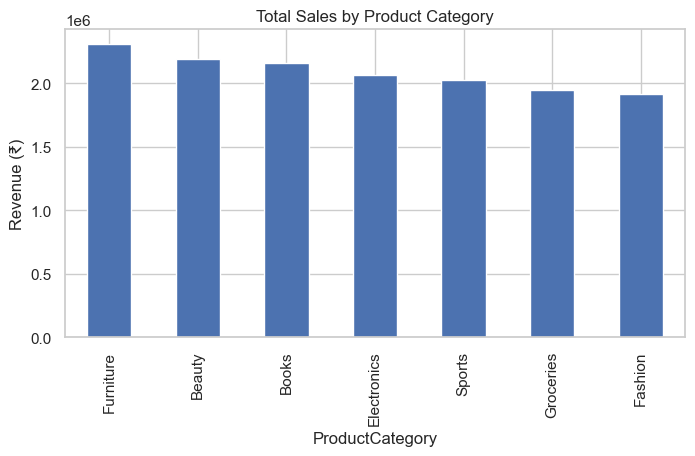

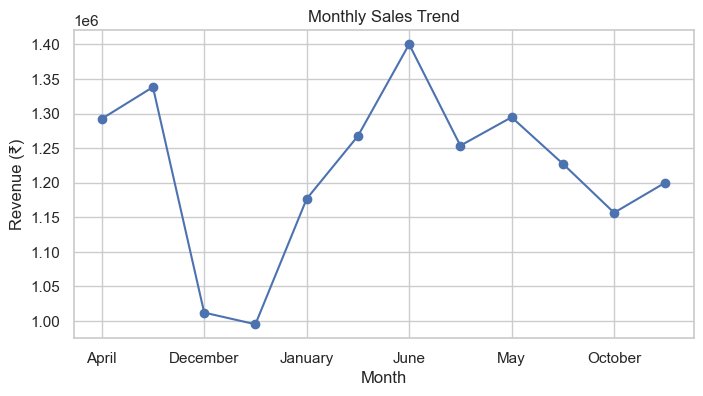

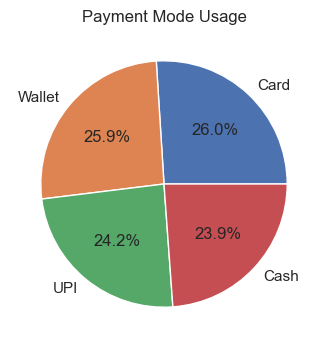

In [14]:
# 2. Sales Insights
plt.figure(figsize=(8,4))
df.groupby('ProductCategory')['TotalAmount'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Sales by Product Category')
plt.ylabel('Revenue (₹)')
plt.show()

plt.figure(figsize=(8,4))
monthly_sales = df.groupby('Month')['TotalAmount'].sum()
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Revenue (₹)')
plt.show()

plt.figure(figsize=(5,4))
df['PaymentMode'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Payment Mode Usage')
plt.ylabel('')
plt.show()

C:\Users\vinot\AppData\Local\Temp\ipykernel_14808\3070586001.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_spend = df.groupby('AgeGroup')['TotalAmount'].mean()


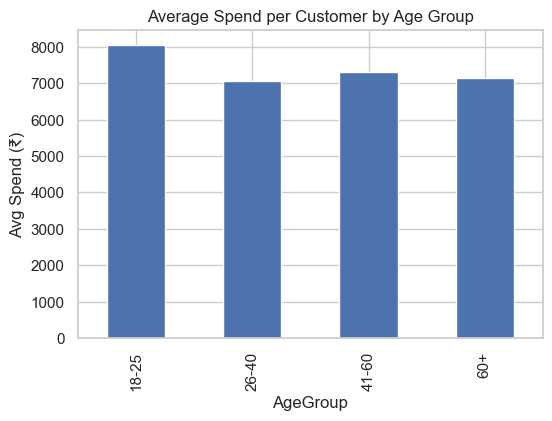

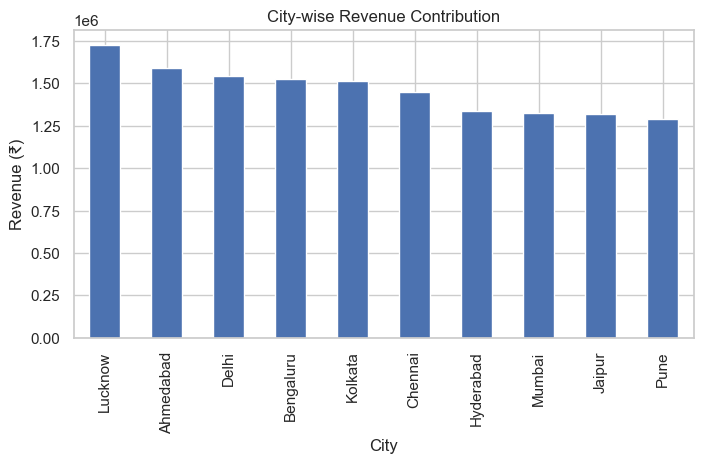

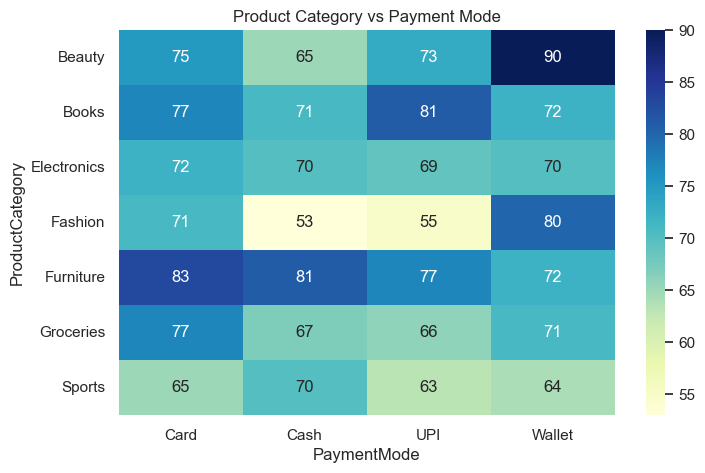

In [13]:

# 3. Advanced Insights
plt.figure(figsize=(6,4))
age_group_spend = df.groupby('AgeGroup')['TotalAmount'].mean()
age_group_spend.plot(kind='bar')
plt.title('Average Spend per Customer by Age Group')
plt.ylabel('Avg Spend (₹)')
plt.show()

plt.figure(figsize=(8,4))
city_revenue = df.groupby('City')['TotalAmount'].sum().sort_values(ascending=False).head(10)
city_revenue.plot(kind='bar')
plt.title('City-wise Revenue Contribution')
plt.ylabel('Revenue (₹)')
plt.show()

plt.figure(figsize=(8,5))
heatmap_data = pd.crosstab(df['ProductCategory'], df['PaymentMode'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Product Category vs Payment Mode')
plt.show()